In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (Replace this with your actual data file path)
data = pd.read_csv('tips (data for regression problem).csv')

In [3]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


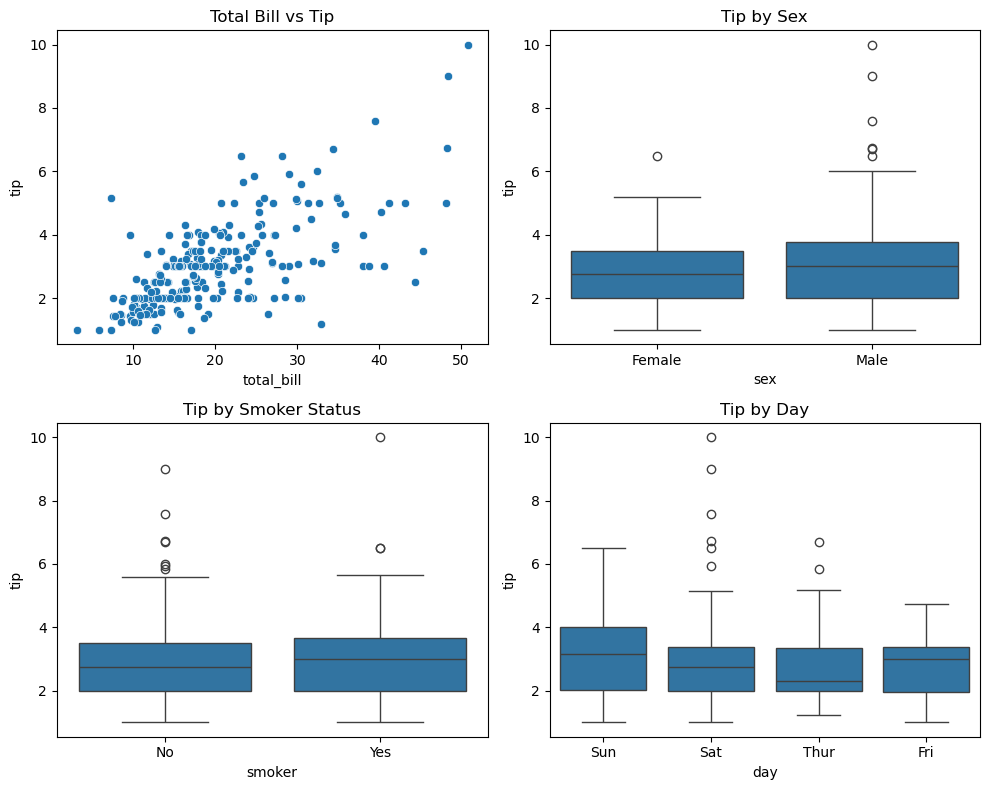

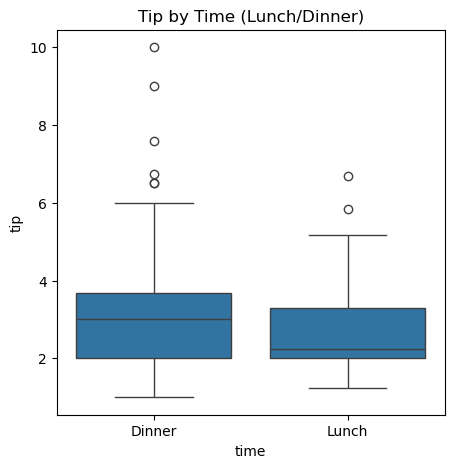

In [6]:
# Set up the plot grid
plt.figure(figsize=(10, 8))

# Plot 1: Scatter plot of total_bill vs tip
plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs Tip')

# Plot 2: Box plot of tip by sex
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='tip', data=data)
plt.title('Tip by Sex')

# Plot 3: Box plot of tip by smoker status
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='tip', data=data)
plt.title('Tip by Smoker Status')

# Plot 4: Box plot of tip by day
plt.subplot(2, 2, 4)
sns.boxplot(x='day', y='tip', data=data)
plt.title('Tip by Day')

plt.tight_layout()
plt.show()

# Additional plot for time if needed
plt.figure(figsize=(5,5))
sns.boxplot(x='time', y='tip', data=data)
plt.title('Tip by Time (Lunch/Dinner)')
plt.show()


Higher tips tend to be associated with larger total bills.

Tips are generally higher during dinner compared to lunch.

Friday sees the lowest tip amounts overall.

Saturday has the greatest variability in tip amounts.

Sunday receives the largest tips on average.

Men tend to leave noticeably higher tips than women.

Tipping patterns between smokers and non-smokers are quite similar.

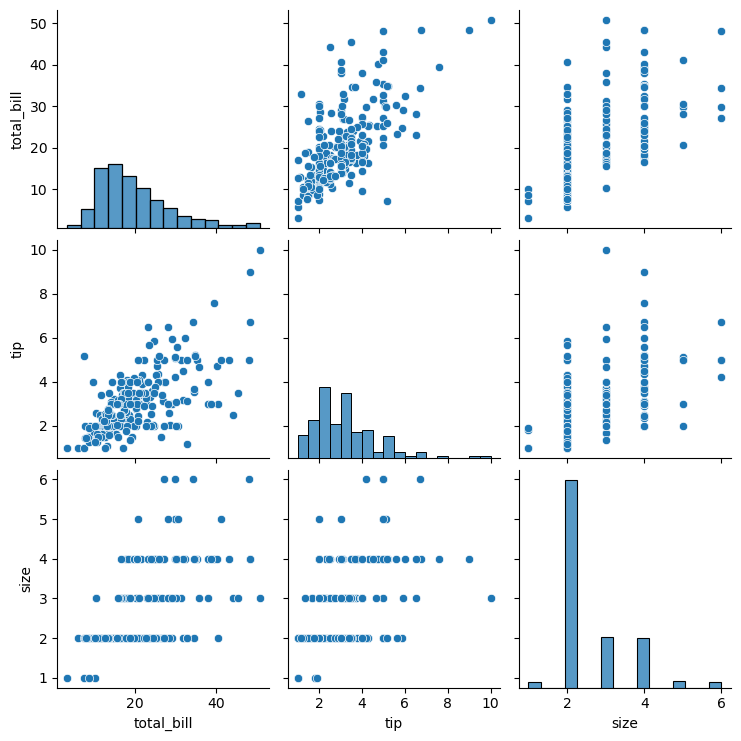

In [7]:
sns.pairplot(data[['total_bill', 'tip','size']])

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


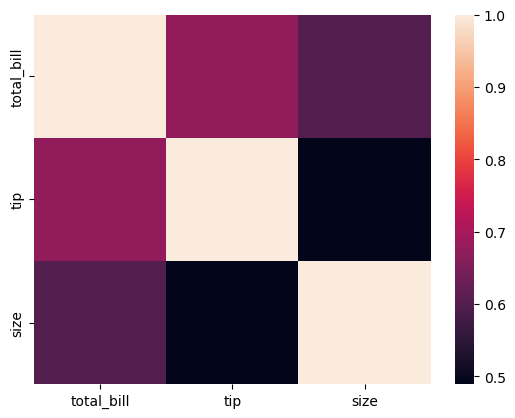

In [8]:
# Convert variable datatypes to get correlation matrix
df_corr = data[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)
corr

### A clear correlation exists between the total bill and tip amount, as well as between group size and tip amount.

In [9]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
# Set up for visualization
sns.set(style="whitegrid")

In [10]:
# 4. Rainbow test for linearity
# Prepare data for linear regression
X = sm.add_constant(data["total_bill"])  # Add constant for intercept
y = data["tip"]
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

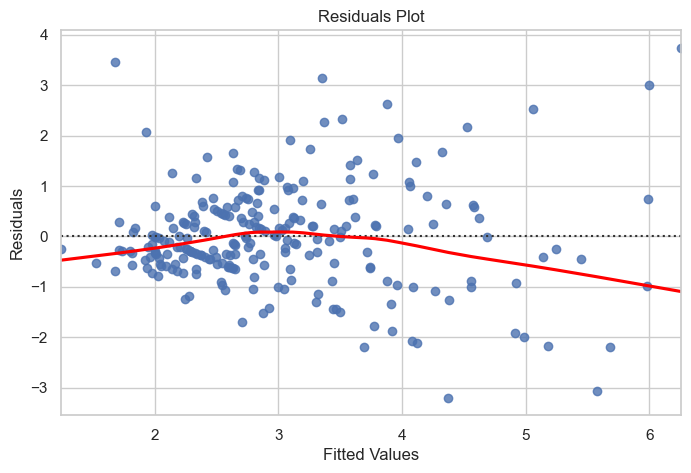

(1.2291480226129026, 0.1291192152551375)

In [11]:
# 5. Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Outputs from the Rainbow Test
rainbow_statistic, rainbow_p_value

The Rainbow test assesses whether a linear model is suitable, even if some relationships within the data may not be linear.

Null Hypothesis: The model is accurately specified as linear.
Alternative Hypothesis: The model is not accurately specified as linear.
If the p-value is below a chosen threshold (e.g., 0.05), we reject the null hypothesis in favor of the alternative, suggesting that a linear model may not be appropriate. Conversely, if the p-value exceeds this threshold, we retain the null hypothesis, indicating that the linear model is likely a good fit.

In this case, the p-value is greater than 0.05, so we accept the null hypothesis, meaning that a linear model appears to be a suitable choice for this data.

In [12]:
# Defining feature columns and target variable
features = ['total_bill', 'sex', 'smoker', 'day', 'time']
target = ['tip']

In [13]:
# Encoding categorical variables using OneHotEncoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [14]:
# Split data into features (X) and target (y)
X = data[features]
y = np.array(data[target])

In [15]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

# Evaluation
print('Linear Regression R2:', f" - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Linear Regression R2:  - MAE: 0.6380, MSE: 0.6387, RMSE: 0.7992, R2: 0.4890


In [18]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

# Evaluation
print('Ridge Regression R2:', f"- MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Ridge Regression R2: - MAE: 0.6375, MSE: 0.6370, RMSE: 0.7981, R2: 0.4904


In [19]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

# Evaluation
print('Lasso Regression R2:' ,f"= MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Lasso Regression R2: = MAE: 0.6346, MSE: 0.6205, RMSE: 0.7877, R2: 0.5036


In [20]:
tree_reg = DecisionTreeRegressor(random_state=0, max_depth=5)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

# Evaluation
print('Decision Tree R2:', f"= MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Decision Tree R2: = MAE: 0.7881, MSE: 1.2200, RMSE: 1.1045, R2: 0.0240


In [21]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_forest)
mse = mean_squared_error(y_test, y_pred_forest)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_forest)

# Evaluation
print('Random Forest R2:', f"= MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Random Forest R2: = MAE: 0.8036, MSE: 1.0220, RMSE: 1.0109, R2: 0.1824


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print('SVR R2:', f"= MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


SVR R2: = MAE: 0.7048, MSE: 0.8441, RMSE: 0.9187, R2: 0.3247


In [23]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

# Evaluation
print('KNN Regression R2:', f"= MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


KNN Regression R2: = MAE: 0.7307, MSE: 0.8776, RMSE: 0.9368, R2: 0.2979


# So Lasso is the best model

The linear models (especially Lasso) perform better in terms of lower error metrics and higher R² values, suggesting they capture more variance while keeping the errors low.

Decision Tree and Random Forest regressions exhibit signs of overfitting, with higher errors and low R² scores, indicating these models may not be well-suited for this dataset.

SVR and KNN offer a middle ground, with moderate error values and R² scores that reflect decent performance but are less effective than Lasso.

In [37]:
# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(5, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

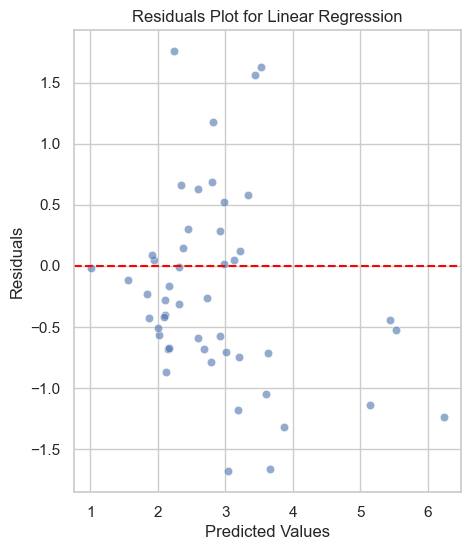

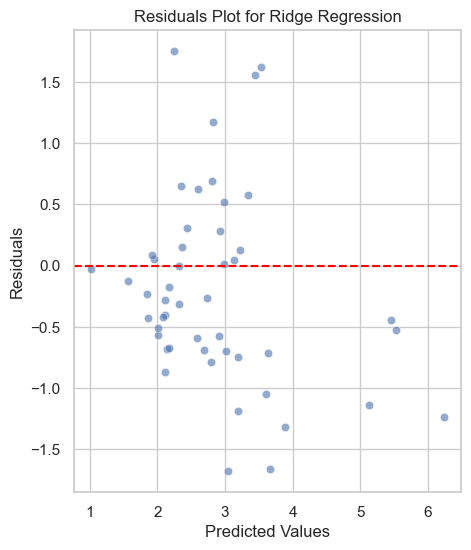

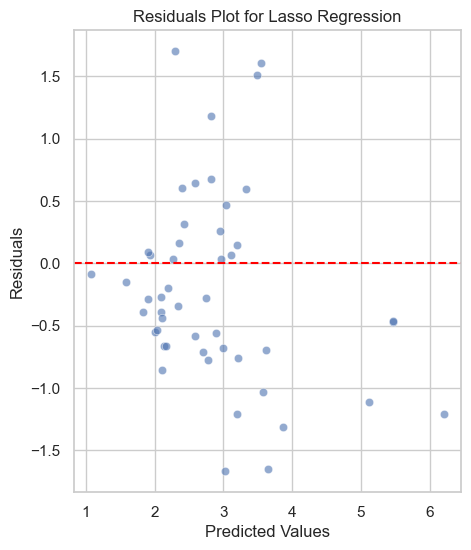

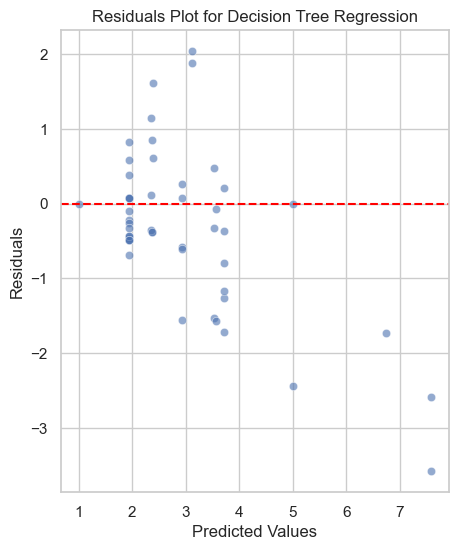

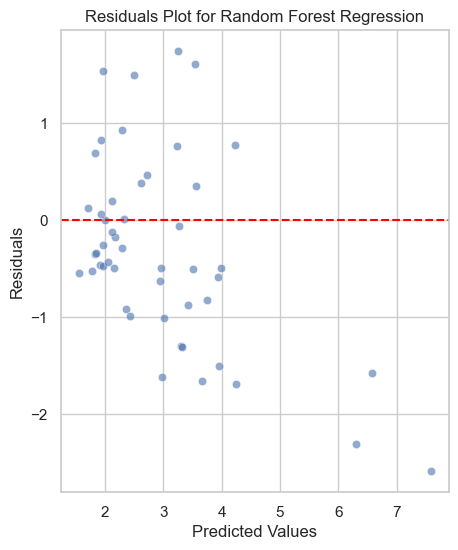

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


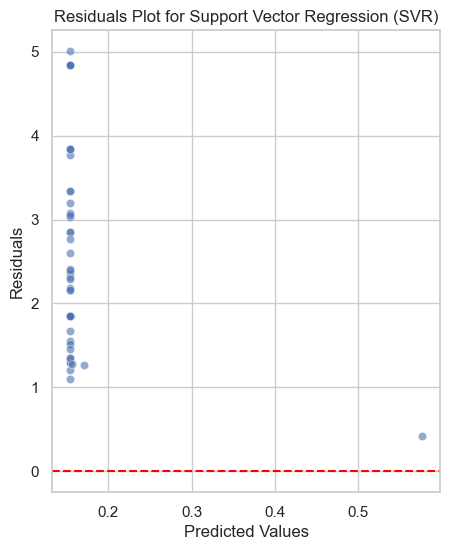

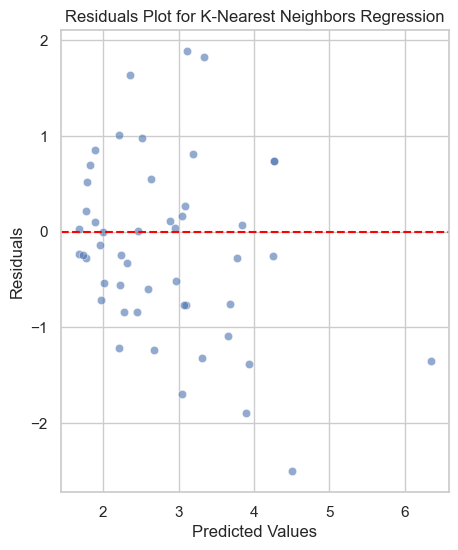

In [38]:
y_test = y_test.ravel()  # Flattens y_test if it's not 1-dimensional
y_pred_lr = y_pred_lr.ravel()  # Flattens y_pred_lr if it's not 1-dimensional

# 1. Linear Regression
y_pred_lr = linear_reg.predict(X_test)
y_pred_lr = y_pred_lr.ravel()  # Flattens y_pred_lr if it's not 1-dimensional
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_ridge = y_pred_ridge.ravel()  # Flattens y_pred_lr if it's not 1-dimensional
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr_reg.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
y_pred_knn = y_pred_knn.ravel()  # Flattens y_pred_lr if it's not 1-dimensional

plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

Conclusion:
The decision tree model shows the lowest residuals, suggesting a possible overfitting to the data.

The business should focus on offering their best services to customers on Sundays, while improving service quality on Fridays to boost tip rates. Additionally, targeting the dinner hours could help increase tips.

Priority should be given to tables with more people, as they tend to provide larger tips. Finally, the business should consider the total bill amount, which shows a strong correlation with the tip size, when making strategic decisions.